In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.append('..')
from configure.settings import DBSelector

In [2]:
import matplotlib.pyplot as plt

In [3]:
def convertor(x):
    try:
        x=float(x)
    except:
        x=-9999
    return x

In [19]:

df['今年来']=df['今年来'].map(convertor)

In [13]:
del df['布吉岛2']
del df['布吉岛3']
del df['布吉岛4']

In [75]:
turnover_db = DBSelector().mongo('qq')['db_stock']['turnover_2021_12_15']

In [4]:
doc_name = 'ttjj_rank_2024_01_19'
rank_db = DBSelector().mongo('qq')['db_stock'][doc_name]

In [5]:
# rank
result_list=[]
for item in rank_db.find():
    del item['_id']
    result_list.append(item)
rank_df = pd.DataFrame(result_list)

In [7]:
len(rank_df)

14774

In [8]:
rank_df.head()

,type,crawl_date,基金代码,基金简称,缩写,日期,单位净值,累计净值,日增长率(%),近1周增幅,...,成立来,成立日期,购买手续费折扣,自定义,手续费原价？,手续费折后？,布吉岛1,布吉岛2,布吉岛3,布吉岛4
0,指数,2024-01-19,017116,浦银安盛中证光伏产业ETF联接A,PYASZZGFCYETFLJA,2024-01-18,0.6113,0.6113,3.05,0.89,...,-38.87,2023-01-04,1,-38.9737,1.20%,0.12%,1,0.12%,1,
1,指数,2024-01-19,017117,浦银安盛中证光伏产业ETF联接C,PYASZZGFCYETFLJC,2024-01-18,0.6089,0.6089,3.05,0.89,...,-39.11,2023-01-04,1,-39.2073,,0.00%,,,,
2,指数,2024-01-19,015299,华夏纳斯达克100ETF发起式联接(QDII)A,HXNSDK100ETFFQSLJQDIIA,2024-01-18,1.305,1.305,1.39,1.33,...,30.5,2022-04-14,1,54.0550,1.20%,0.12%,1,0.12%,1,
3,指数,2024-01-19,015300,华夏纳斯达克100ETF发起式联接(QDII)C,HXNSDK100ETFFQSLJQDIIC,2024-01-18,1.2982,1.2982,1.4,1.33,...,29.82,2022-04-14,1,53.6150,,0.00%,,,,
4,指数,2024-01-19,017091,景顺长城纳斯达克科技ETF联接(QDII)A人民币,JSCCNSDKKJETFLJQDIIARMB,2024-01-17,1.4879,1.4879,-0.64,0.94,...,48.79,2022-12-09,1,,1.20%,0.12%,1,0.12%,1,


In [11]:
rank_df[rank_df.duplicated(['基金代码'])] # 查重

,type,crawl_date,基金代码,基金简称,缩写,日期,单位净值,累计净值,日增长率(%),近1周增幅,...,成立来,成立日期,购买手续费折扣,自定义,手续费原价？,手续费折后？,布吉岛1,布吉岛2,布吉岛3,布吉岛4


In [6]:
rank_df = rank_df.sort_values(by='今年来',ascending=False)

In [7]:
del rank_df['布吉岛1']
del rank_df['布吉岛2']
del rank_df['布吉岛3']
del rank_df['布吉岛4']
del rank_df['手续费原价？']
del rank_df['手续费折后？']
del rank_df['购买手续费折扣']
del rank_df['自定义']
del rank_df['缩写']

In [8]:
del rank_df['crawl_date']
# del rank_df['crawl_date']


In [9]:
rank_df.head()

,type,基金代码,基金简称,日期,单位净值,累计净值,日增长率(%),近1周增幅,近1月增幅,近3月增幅,近6月增幅,近1年增幅,近2年增幅,近3年增幅,今年来,成立来,成立日期
2368,股票,006692,金信消费升级股票A,2024-01-18,1.4183,2.1737,-0.29,1.6,4.25,4.49,-12.75,-18.71,-11.64,-8.18,5.31,121.63,2019-01-31
2369,股票,006693,金信消费升级股票C,2024-01-18,1.4422,2.18,-0.29,1.58,4.18,4.28,-13.1,-19.36,-13.04,-10.35,5.27,113.09,2019-01-31
3291,混合,011134,广发价值优选混合A,2024-01-18,0.8448,0.8448,0.15,2.18,4.85,0.68,-10.9,-14.32,-23.21,,4.58,-15.52,2021-03-22
3292,混合,011135,广发价值优选混合C,2024-01-18,0.8353,0.8353,0.16,2.18,4.82,0.59,-11.07,-14.66,-23.83,,4.57,-16.47,2021-03-22
3293,混合,008297,广发价值优势混合,2024-01-18,1.2613,1.2613,0.15,2.08,4.84,0.97,-10.69,-13.92,-23,-27.3,4.35,26.13,2020-03-02


In [29]:
len(rank_df)

14774

In [10]:
rank_df['今年来'] = rank_df['今年来'].map(convertor)

In [11]:
len(rank_df[rank_df['今年来']>0])

2837

In [12]:
positive_fund = rank_df[rank_df['今年来']>0]
positive_fund.groupby('type').count()['基金代码']

type
fof       32
qdii      42
债券      2106
指数       372
混合       261
股票        24
Name: 基金代码, dtype: int64

In [51]:
rank_df_no_dup.groupby('type').count()['基金代码']

type
fof      813
qdii     185
债券      3211
指数      2345
混合      7250
股票       922
Name: 基金代码, dtype: int64

In [45]:
len(rank_df[rank_df['今年来']==-9999.0])

48

In [13]:
rank_df_no_dup = rank_df[~(rank_df['今年来']==-9999.0)]

In [17]:
for type,rows in rank_df_no_dup.groupby('type'):
  print(type,round(rows['今年来'].median(),2))

fof -2.43
qdii -1.99
债券 0.11
指数 -5.0
混合 -5.66
股票 -7.06


In [15]:
rank_df[rank_df['type']=='qdii']['今年来'].min()

-9999.0

In [14]:
rank_df.tail()

,type,crawl_date,基金代码,基金简称,缩写,日期,单位净值,累计净值,日增长率(%),近1周增幅,...,成立来,成立日期,购买手续费折扣,自定义,手续费原价？,手续费折后？,布吉岛1,布吉岛2,布吉岛3,布吉岛4
10543,混合,2024-01-19,020361,中海蓝筹混合C,ZHLCHHC,2024-01-18,0.6547,0.6547,0.28,0.06,...,-1.77,2024-01-04,1,-1.770443,,0.00%,,,,
2354,指数,2024-01-19,019919,招商中证2000指数增强C,ZSZZ2000ZSZQC,2024-01-18,0.975,0.975,-0.86,-3.55,...,-2.5,2024-01-02,1,-2.5,,0.00%,,,,
2353,指数,2024-01-19,020104,易方达中证石化产业ETF联接发起式A,YFDZZSHCYETFLJFQSA,2024-01-19,0.9732,0.9732,-0.01,-2.09,...,-2.68,2024-01-05,1,-2.67,1.20%,0.12%,1,0.12%,1,
2352,指数,2024-01-19,019409,易方达中证港股通中国100ETF联接发起式C,YFDZZGGTZG100ETFLJFQSC,2024-01-19,0.9478,0.9478,-0.84,-5.02,...,-5.22,2024-01-04,1,-4.42,,0.00%,,,,
14773,债券,2024-01-19,020605,长城稳健增利债券E,CCWJZLZQE,2024-01-18,1.1328,1.1328,,,...,0,2024-01-18,1,0,,0.00%,,,,


In [24]:
rank_df.to_excel('ttjj_rank_2024_01_19.xlsx',index=False)

In [ ]:
# 换手率

In [77]:
result_list=[]
for item in turnover_db.find():
    item_dict={}
    item_dict['code']=item['code']
    
    rate_list = item['turnover_rate']
    item_dict['kind']=item['kind']
    turnover_num=None
    sum_turnover=[]
    for r in rate_list:
        # r.get('REPORTDATE')=='2021-06-30':
        turnover_num=r.get('STOCKTURNOVER')
        sum_turnover.append(turnover_num)

    t_mean=np.mean(sum_turnover)    
    item_dict['turnover']=t_mean
    result_list.append(item_dict)

C:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\anaconda\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [78]:
turnover_rate_df = pd.DataFrame(result_list)

In [79]:
len(turnover_rate_df)

9600

In [12]:
turnover_rate_df=turnover_rate_df[turnover_rate_df['turnover'].notnull()]

In [27]:
set(index_code)&set(stock_code)

set()

In [80]:
rank_list=[]
for item in rank_db.find({},{'_id':0}):
    rank_list.append(item)

In [81]:
rank_df = pd.DataFrame(rank_list)

In [82]:
len(rank_df)

11575

In [83]:
rank_df_new=rank_df[(rank_df['type']=='股票')|(rank_df['type']=='混合')]

In [84]:
len(rank_df_new)

7181

In [16]:
rank_df_new[rank_df_new.duplicated(['基金代码'])]

,type,crawl_date,基金代码,基金简称,缩写,日期,单位净值,累计净值,日增长率(%),近1周增幅,...,成立来,成立日期,购买手续费折扣,自定义,手续费原价？,手续费折后？,布吉岛1,布吉岛2,布吉岛3,布吉岛4


In [85]:
rank_fund_turnover = pd.merge(rank_df_new,turnover_rate_df,how='inner',left_on='基金代码',right_on='code')

In [46]:
len(rank_df_new)

7181

In [50]:
len(turnover_rate_df['code'].values)

4933

In [49]:
len(set(turnover_rate_df['code'].values))

4933

In [87]:
len(rank_fund_turnover_simple)

7181

In [ ]:
rank_fund_turnover.head()

In [86]:
rank_fund_turnover_simple=rank_fund_turnover[['type','基金代码','基金简称','今年来','成立来','turnover','累计净值','成立日期']]

In [28]:
rank_fund_turnover_simple.head()

,type,基金代码,基金简称,今年来,成立来,turnover,累计净值,成立日期
0,股票,005669,前海开源公用事业股票,122.24,269.23,99.302857,3.6923,2018-03-23
1,股票,004784,招商稳健优选股票,69.90,270.29,347.798750,3.7029,2017-09-20
2,股票,000729,建信中小盘先锋股票A,67.22,322.40,534.246429,4.2240,2014-08-20
3,股票,001245,工银生态环境股票,66.24,197.40,254.500000,2.9740,2015-06-02
4,股票,009147,建信新能源行业股票,65.94,186.84,178.655000,2.8684,2020-06-17


In [88]:
rank_fund_turnover_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7181 entries, 0 to 7180
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   type      7181 non-null   object 
 1   基金代码      7181 non-null   object 
 2   基金简称      7181 non-null   object 
 3   今年来       5381 non-null   float64
 4   成立来       7181 non-null   float64
 5   turnover  5587 non-null   float64
 6   累计净值      7181 non-null   object 
 7   成立日期      7181 non-null   object 
dtypes: float64(3), object(5)
memory usage: 504.9+ KB


In [29]:
rank_fund_turnover_simple['今年来']=rank_fund_turnover_simple['今年来'].map(convertor)
rank_fund_turnover_simple['成立来']=rank_fund_turnover_simple['成立来'].map(convertor)

<ipython-input-29-3a6386e959a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_fund_turnover_simple['今年来']=rank_fund_turnover_simple['今年来'].map(convertor)
<ipython-input-29-3a6386e959a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_fund_turnover_simple['成立来']=rank_fund_turnover_simple['成立来'].map(convertor)


In [28]:
rank_fund_turnover_simple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5587 entries, 0 to 5586
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   type      5587 non-null   object 
 1   基金代码      5587 non-null   object 
 2   基金简称      5587 non-null   object 
 3   今年来       5587 non-null   float64
 4   成立来       5587 non-null   float64
 5   turnover  5587 non-null   float64
 6   累计净值      5587 non-null   object 
dtypes: float64(3), object(4)
memory usage: 349.2+ KB


In [23]:
pd.set_option('display.max_rows',None)

In [30]:
rank_fund_turnover_simple.sort_values(by='成立来',ascending=False).head(50).to_excel('1110.xlsx',encoding='utf8')

In [88]:
rank_fund_turnover_simple.sort_values(by='成立来',ascending=False).head(50)['turnover'].describe()

count      50.000000
mean      190.172400
std       192.410815
min        17.960000
25%        79.732500
50%       117.380000
75%       243.692500
max      1202.400000
Name: turnover, dtype: float64

In [ ]:
rank_fund_turnover_simple.sort_values(by='成立来',ascending=True).head(40)

In [32]:
rank_fund_turnover_simple.sort_values(by='成立来',ascending=True).head(50).to_excel('2220.xlsx',encoding='utf8')

In [31]:
rank_fund_turnover_simple.sort_values(by='成立来',ascending=False).head(50)['turnover'].describe()

count     50.000000
mean     232.557079
std       84.453710
min      106.232941
25%      179.503714
50%      220.323833
75%      273.613534
max      477.521562
Name: turnover, dtype: float64

In [30]:
rank_fund_turnover_simple_new=rank_fund_turnover_simple[rank_fund_turnover_simple['今年来']!=-9999]

In [35]:
rank_fund_turnover_simple_new.sort_values(by='成立来',ascending=True).head(50)['turnover'].describe()

count     50.000000
mean     138.607154
std      113.426761
min        9.865000
25%       68.684148
50%      112.135000
75%      161.401111
max      530.025833
Name: turnover, dtype: float64

In [34]:
rank_fund_turnover_simple_new.sort_values(by='成立来',ascending=True).head(50).to_excel("3330.xlsx",encoding='utf8')

In [3]:
import os


(array([882., 926., 762., 598., 490., 368., 272., 215., 129.,  84.,  68.,
         53.,  52.,  18.,  30.,  16.,  17.,  10.,   5.,   5.,   2.,   6.,
          2.,   0.,   1.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([2.65000000e-01, 6.16151944e+01, 1.22965389e+02, 1.84315583e+02,
        2.45665778e+02, 3.07015972e+02, 3.68366167e+02, 4.29716361e+02,
        4.91066556e+02, 5.52416750e+02, 6.13766944e+02, 6.75117139e+02,
        7.36467333e+02, 7.97817528e+02, 8.59167722e+02, 9.20517917e+02,
        9.81868111e+02, 1.0432

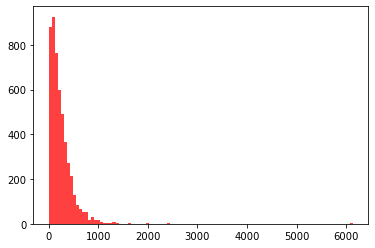

In [38]:
plt.hist(rank_fund_turnover_simple_new['turnover'],bins=100,color='red',alpha=0.75)

In [39]:
rank_fund_turnover_simple_new['turnover'].describe()

count    5020.000000
mean      238.652873
std       244.260390
min         0.265000
25%        84.308583
50%       178.617727
75%       324.389722
max      6135.284444
Name: turnover, dtype: float64

In [41]:
rank_fund_turnover_simple_new['turnover'].argmax()

3184

In [42]:
rank_fund_turnover_simple_new.iloc[3184]

type                 混合
基金代码             003373
基金简称        大成景禄灵活配置混合A
今年来                6.74
成立来               52.61
turnover        6135.28
累计净值             1.5261
Name: 3293, dtype: object

In [ ]:
rank_fund_turnover_simple_new.sort_values('turnover',ascending=False)

In [44]:
t=rank_fund_turnover[['基金代码','成立日期']]

In [45]:
merge_df = pd.merge(rank_fund_turnover_simple_new,t,how='inner',left_on='基金代码',right_on='基金代码')

In [46]:
merge_df.head()

,type,基金代码,基金简称,今年来,成立来,turnover,累计净值,成立日期
0,股票,005669,前海开源公用事业股票,122.24,269.23,99.302857,3.6923,2018-03-23
1,股票,004784,招商稳健优选股票,69.90,270.29,347.798750,3.7029,2017-09-20
2,股票,000729,建信中小盘先锋股票A,67.22,322.40,534.246429,4.2240,2014-08-20
3,股票,001245,工银生态环境股票,66.24,197.40,254.500000,2.9740,2015-06-02
4,股票,009147,建信新能源行业股票,65.94,186.84,178.655000,2.8684,2020-06-17


In [89]:
import datetime
now = datetime.datetime.now()

def calc_year(x):
    built_date = datetime.datetime.strptime(x,"%Y-%m-%d")
    day=(now-built_date).days/365
    return day


In [ ]:
rank_fund_turnover_simple_new

In [56]:
calc_year('2018-03-23')

3.736986301369863

In [90]:
rank_fund_turnover_simple['成立区间']=rank_fund_turnover_simple['成立日期'].map(calc_year)

<ipython-input-90-6c8e637e7e46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_fund_turnover_simple['成立区间']=rank_fund_turnover_simple['成立日期'].map(calc_year)


In [91]:
rank_fund_turnover_simple.head()

,type,基金代码,基金简称,今年来,成立来,turnover,累计净值,成立日期,成立区间
0,股票,005669,前海开源公用事业股票,122.24,269.23,99.302857,3.6923,2018-03-23,3.739726
1,股票,004784,招商稳健优选股票,69.90,270.29,347.798750,3.7029,2017-09-20,4.243836
2,股票,000729,建信中小盘先锋股票A,67.22,322.40,534.246429,4.2240,2014-08-20,7.331507
3,股票,001245,工银生态环境股票,66.24,197.40,254.500000,2.9740,2015-06-02,6.547945
4,股票,009147,建信新能源行业股票,65.94,186.84,178.655000,2.8684,2020-06-17,1.501370


In [64]:
merge_df['累计净值']=merge_df['累计净值'].astype(float)


In [65]:
merge_df.head()

,type,基金代码,基金简称,今年来,成立来,turnover,累计净值,成立日期,年化
0,股票,005669,前海开源公用事业股票,122.24,269.23,99.302857,3.6923,2018-03-23,0.720447
1,股票,004784,招商稳健优选股票,69.90,270.29,347.798750,3.7029,2017-09-20,0.637312
2,股票,000729,建信中小盘先锋股票A,67.22,322.40,534.246429,4.2240,2014-08-20,0.439910
3,股票,001245,工银生态环境股票,66.24,197.40,254.500000,2.9740,2015-06-02,0.301595
4,股票,009147,建信新能源行业股票,65.94,186.84,178.655000,2.8684,2020-06-17,1.246739


In [92]:
def profit(x):
    return (x['成立来']*0.01+1)**(1/x['成立区间'])-1

In [68]:
profit(2,2)

0.41421356237309515

In [69]:
(1+0.41)**2

1.9880999999999998

In [93]:
rank_fund_turnover_simple['年化收益']=rank_fund_turnover_simple.apply(profit,axis=1)

<ipython-input-93-42768c585b22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_fund_turnover_simple['年化收益']=rank_fund_turnover_simple.apply(profit,axis=1)


In [94]:
rank_fund_turnover_simple.head()

,type,基金代码,基金简称,今年来,成立来,turnover,累计净值,成立日期,成立区间,年化收益
0,股票,005669,前海开源公用事业股票,122.24,269.23,99.302857,3.6923,2018-03-23,3.739726,0.418061
1,股票,004784,招商稳健优选股票,69.90,270.29,347.798750,3.7029,2017-09-20,4.243836,0.361347
2,股票,000729,建信中小盘先锋股票A,67.22,322.40,534.246429,4.2240,2014-08-20,7.331507,0.217159
3,股票,001245,工银生态环境股票,66.24,197.40,254.500000,2.9740,2015-06-02,6.547945,0.181105
4,股票,009147,建信新能源行业股票,65.94,186.84,178.655000,2.8684,2020-06-17,1.501370,1.017506


In [ ]:
merge_df.sort_values('年化收益',ascending=False).head(50)

In [ ]:
merge_df.sort_values('turnover',ascending=False).head(50)

In [36]:
rank_fund_turnover_simple_new.sort_values('turnover',ascending=False).head(50)

,type,基金代码,基金简称,今年来,成立来,turnover,累计净值,成立日期,成立区间,年化收益
3293,混合,003373,大成景禄灵活配置混合A,6.74,52.61,6135.284444,1.5261,2016-09-29,5.219178,0.084363
3318,混合,003374,大成景禄灵活配置混合C,6.64,52.46,6135.284444,1.5246,2016-09-29,5.219178,0.084159
4984,混合,007875,国融融兴混合A,-11.36,18.72,2415.220000,1.1872,2019-11-05,2.117808,0.084399
4996,混合,007876,国融融兴混合C,-11.54,18.21,2415.220000,1.1821,2019-11-05,2.117808,0.082197
1555,混合,005856,中科沃土沃瑞混合C,49.86,231.50,1995.410000,3.3150,2019-01-14,2.926027,0.506193
1554,混合,005855,中科沃土沃瑞混合A,50.29,235.41,1995.410000,3.3541,2019-01-14,2.926027,0.512241
2974,混合,003238,新华外延增长主题灵活配置混合,8.45,170.67,1666.887778,2.7067,2017-03-02,4.797260,0.230674
220,股票,003647,创金合信中证1000指数增强C,23.09,71.82,1599.192222,1.7182,2016-12-22,4.989041,0.114597
215,股票,003646,创金合信中证1000指数增强A,23.32,73.81,1599.192222,1.7381,2016-12-22,4.989041,0.117173
3747,混合,004557,北信瑞丰鼎丰灵活配置混合,4.78,38.90,1491.363333,1.3890,2019-11-13,2.095890,0.169733


In [95]:
rank_remove_AC = rank_fund_turnover_simple.copy() # 移除了AC

In [96]:
def split_AC(x):
    if x.endswith(('A','C')):
        x=x[:-1]
    return x

rank_remove_AC['parent']=rank_remove_AC['基金简称'].map(split_AC)

In [97]:
def split_C(x):
    if x.endswith('C'):
        return 'C'
    return None

rank_remove_AC['isC']=rank_remove_AC['基金简称'].map(split_C)

In [ ]:
rank_remove_AC.sort_values('turnover',ascending=False).head(50)

In [98]:
result_rank_remove_AC = rank_remove_AC.copy()
       

In [99]:
for index,row in rank_remove_AC[rank_remove_AC['isC']=='C'].iterrows():

    parent = row['parent']
    if len(rank_remove_AC[rank_remove_AC['parent']==parent])>1:

        result_rank_remove_AC=result_rank_remove_AC.drop(index)

In [ ]:
result_rank_remove_AC.sort_values('turnover',ascending=False).head(50)

In [100]:
len(result_rank_remove_AC)

4708

In [52]:
rank_remove_AC.iloc[8]

type                  股票
基金代码              005928
基金简称        创金合信新能源汽车股票C
今年来                 61.3
成立来                241.4
turnover         543.763
累计净值              3.4140
成立日期          2018-05-08
成立区间              3.6137
年化收益            0.404647
parent       创金合信新能源汽车股票
isC                    C
Name: 8, dtype: object

In [ ]:
result_rank_remove_AC.sort_values('成立来',ascending=True).head(50)

In [106]:
result_rank_remove_AC_simple=result_rank_remove_AC[['type',	'基金代码',	'基金简称',	'今年来',	'成立来',	'turnover',	'累计净值',	'成立日期',	'年化收益']]

In [ ]:
result_rank_remove_AC_simple.sort_values('turnover',ascending=False).tail(50)

In [59]:
result_rank_remove_AC[result_rank_remove_AC['基金简称']=='华安证券汇赢增利一年持有混合A']

,type,基金代码,基金简称,今年来,成立来,turnover,累计净值,成立日期,成立区间,年化收益,parent,isC


In [60]:
result_rank_remove_AC_simple.describe()

,今年来,成立来,turnover,年化收益
count,3607.000000,3924.000000,3924.000000,3924.000000
mean,10.315403,148.231598,240.080724,0.145564
std,16.027595,278.785779,227.790755,0.144417
min,-31.420000,-72.250000,0.750000,-0.285147
25%,0.230000,30.752500,88.540833,0.072731
50%,6.930000,73.140000,185.838500,0.125865
75%,17.400000,161.292500,326.658389,0.197252
max,122.240000,9223.380000,6135.284444,4.742858


In [61]:
len(rank_fund_turnover_simple)

3924

In [62]:
len(rank_remove_AC)

5587

In [67]:
result_rank_remove_AC_simple.sort_values('成立来',ascending=False).head(50).to_excel('4441.xlsx',encoding='utf8')

In [107]:
result_rank_remove_AC_simple['年化收益']=result_rank_remove_AC_simple['年化收益']*100

<ipython-input-107-821d755b8eb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_rank_remove_AC_simple['年化收益']=result_rank_remove_AC_simple['年化收益']*100


In [108]:
result_rank_remove_AC_simple.sort_values('成立来',ascending=False).head(50).describe()

,今年来,成立来,turnover,年化收益
count,50.000000,50.000000,50.000000,50.000000
mean,10.549200,1754.962000,232.557079,26.777715
std,16.301332,1200.010311,84.453710,64.611754
min,-11.430000,1140.290000,106.232941,14.492094
25%,-0.727500,1253.312500,179.503714,16.208983
50%,7.285000,1396.155000,220.323833,17.516235
75%,16.197500,1897.947500,273.613534,18.739220
max,59.300000,9223.380000,477.521562,474.285794


In [70]:
result_rank_remove_AC_simple.sort_values('成立来',ascending=True).head(50).to_excel('4442.xlsx',encoding='utf8')

In [109]:
len(result_rank_remove_AC_simple)

4708

In [72]:
rank_fund_turnover_simple[rank_fund_turnover_simple['今年来']==-9999]

,type,基金代码,基金简称,今年来,成立来,turnover,累计净值,成立日期


In [114]:
result_rank_remove_AC_simple.sort_values('成立来',ascending=True).head(50)

,type,基金代码,基金简称,今年来,成立来,turnover,累计净值,成立日期,年化收益
1031,股票,164818,工银中证传媒指数(LOF)A,-2.01,-72.25,103.285000,0.2898,2015-05-21,-17.699954
720,股票,160639,鹏华中证高铁产业指数(LOF),5.34,-62.43,210.740833,0.38,2015-05-27,-13.854522
744,股票,160135,南方中证高铁产业指数(LOF),4.80,-54.22,67.665833,1.0137,2015-06-10,-11.283484
290,股票,162413,华宝中证1000指数,20.19,-50.22,62.909167,0.4850,2015-06-04,-10.113271
538,股票,161123,易方达中证万得并购重组(LOF),11.27,-45.25,190.600000,0.5358,2015-06-03,-8.792745
47,股票,168203,中融国证钢铁行业指数(LOF),45.16,-42.13,245.194167,1.35,2015-06-19,-8.068979
315,股票,164908,交银中证环境治理(LOF)A,18.90,-41.62,75.400000,0.5838,2015-08-13,-8.125463
934,股票,165523,信诚中证信息安全指数(LOF)A,-0.32,-39.21,60.851667,0.6175,2015-06-26,-7.391246
4839,混合,001239,长盛国企改革混合,1.56,-35.10,390.284167,0.6490,2015-06-04,-6.394351
715,股票,502013,长盛中证申万一带一路指数(LOF),5.39,-34.49,66.969167,1.4976,2015-05-29,-6.245217


In [112]:
result_rank_remove_AC_simple=result_rank_remove_AC_simple[~result_rank_remove_AC_simple['turnover'].isnull()]

In [113]:
len(result_rank_remove_AC_simple)

3923

In [115]:
result_rank_remove_AC_simple.sort_values('成立来',ascending=True).head(50)['turnover'].describe()

count     50.000000
mean     156.958850
std      123.899374
min        9.865000
25%       75.348125
50%      124.592000
75%      182.877500
max      530.025833
Name: turnover, dtype: float64

In [117]:
result_rank_remove_AC_simple['turnover'].describe()

count    3923.000000
mean      239.939612
std       227.648195
min         0.750000
25%        88.537222
50%       185.725000
75%       326.555500
max      6135.284444
Name: turnover, dtype: float64

(array([188., 293., 322., 302., 259., 236., 258., 223., 205., 179., 162.,
        150., 142., 121., 111., 101.,  86.,  66.,  63.,  60.,  45.,  41.,
         36.,  24.,  23.,  28.,  22.,  24.,  17.,  14.,  15.,  19.,   8.,
          4.,   4.,   6.,  13.,   8.,   3.,   5.,   0.,   5.,   6.,   3.,
          4.,   2.,   1.,   2.,   1.,   2.]),
 array([1.10000000e+00, 2.57392400e+01, 5.03784800e+01, 7.50177200e+01,
        9.96569600e+01, 1.24296200e+02, 1.48935440e+02, 1.73574680e+02,
        1.98213920e+02, 2.22853160e+02, 2.47492400e+02, 2.72131640e+02,
        2.96770880e+02, 3.21410120e+02, 3.46049360e+02, 3.70688600e+02,
        3.95327840e+02, 4.19967080e+02, 4.44606320e+02, 4.69245560e+02,
        4.93884800e+02, 5.18524040e+02, 5.43163280e+02, 5.67802520e+02,
        5.92441760e+02, 6.17081000e+02, 6.41720240e+02, 6.66359480e+02,
        6.90998720e+02, 7.15637960e+02, 7.40277200e+02, 7.64916440e+02,
        7.89555680e+02, 8.14194920e+02, 8.38834160e+02, 8.63473400e+02,
        8.

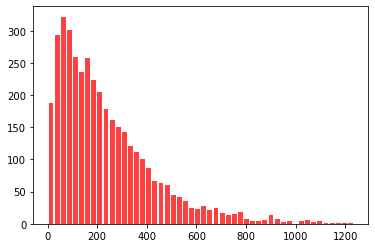

In [130]:
plt.hist(Y1,bins=50,rwidth=0.8,color='red',alpha=0.75)

In [123]:
Y = result_rank_remove_AC_simple['turnover'].values

In [124]:
Y_=sorted(Y)

In [127]:
Y1=Y_[1:-10]

In [132]:
result_rank_remove_AC_simple.sort_values('turnover',ascending=False).head(20).to_excel("turnvoer_max.xlsx",encoding='utf8')

In [133]:
result_rank_remove_AC_simple.sort_values('turnover',ascending=False).head(50)

,type,基金代码,基金简称,今年来,成立来,turnover,累计净值,成立日期,年化收益
3811,混合,003373,大成景禄灵活配置混合A,6.74,52.61,6135.284444,1.5261,2016-09-29,8.436301
5711,混合,007875,国融融兴混合A,-11.36,18.72,2415.220000,1.1872,2019-11-05,8.439912
1992,混合,005855,中科沃土沃瑞混合A,50.29,235.41,1995.410000,3.3541,2019-01-14,51.224102
3471,混合,003238,新华外延增长主题灵活配置混合,8.45,170.67,1666.887778,2.7067,2017-03-02,23.067434
224,股票,003646,创金合信中证1000指数增强A,23.32,73.81,1599.192222,1.7381,2016-12-22,11.717297
4306,混合,004557,北信瑞丰鼎丰灵活配置混合,4.78,38.90,1491.363333,1.3890,2019-11-13,16.973287
2589,混合,001897,九泰久盛量化先锋混合A,20.46,90.83,1396.054545,1.80,2015-11-10,11.161922
212,股票,003016,中金中证500A,23.92,89.68,1327.906000,1.8968,2016-07-22,12.565998
678,股票,900029,中信证券量化优选A,6.44,55.86,1304.910000,2.3413,2020-05-22,32.604347
4187,混合,005290,诺德新盛灵活配置混合A,5.32,61.84,1301.222857,1.6184,2017-12-20,12.808850


In [134]:
df = pd.merge(result_rank_remove_AC_simple,result_rank_remove_AC,how='inner',left_on='基金代码',right_on='基金代码')

In [135]:
df.to_excel("all_fund.xlsx",encoding='utf8')

In [136]:
result_rank_remove_AC_simple.to_excel("all_fund.xlsx",encoding='utf8')